In [8]:
#url编码, URL 只能使用 ASCII 字符集. 来通过因特网进行发送
import urllib
print('编码：',urllib.parse.quote("海报"))
print( '解码：',urllib.parse.unquote('%E6%B5%B7%E6%8A%A5', encoding='utf-8', errors='replace'))

编码： %E6%B5%B7%E6%8A%A5
解码： 海报


In [9]:
# 待下载的图片url
images={}


In [10]:
from pyppeteer import launch

url='https://cn.bing.com/images/search?q=%E7%BE%8E%E9%A3%9F%E6%B5%B7%E6%8A%A5'

#试试修改headless
browser = await launch(headless=True)
page = await browser.newPage()
await page.goto(url)

#页面等待时间,ms, 
await page.waitFor(2500)

#注入js代码，获取页面里所有图片url
#配合chrome的console演示
async def get_imgs(page):
    imgs = await page.evaluate('''() => {
            return Array.from(document.images,img=>{
                    if(img.alt.match('美食')&&img.src.match('https://')){
                        return img.src;
                    }
                }).filter(img=>{return !!img});
        }''')
    return imgs

#当图片数量大于 100的时候，停止
while len(images)<100:
    imgs=await get_imgs(page)
    #python 列表，javscript 数组
    for img in imgs:
        #字典，如何赋值
        images[img]=1
        
    await page.evaluate('''() => {
            return window.scrollTo(100,document.body.scrollHeight);
        }''')
    print(len(images))
    await page.waitFor(2500)
    
    
#关闭浏览器
await browser.close()

2
2
2
54
80
106


In [12]:
#根据url下载图片至本地,路径？
import requests
def download_img(img_url,file_path='test.png'):
    print (img_url)
    r = requests.get(img_url, stream=True)
    print(r.status_code) # 返回状态码
    if r.status_code == 200:
        open(file_path, 'wb').write(r.content) # 将内容写入图片
        print("done")
    del r
#download_img(list(images.keys())[0])

#全部下载保存,# enumerate
for i,img in enumerate(images.keys()):
    #print(i)
    download_img(img,"img/img_"+str(i)+".png")

https://th.bing.com/th/id/OIP.VwW5eQfOYJBZQJnZ9Bb_XAHaKe?w=172&h=243&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.uGi0kNKXQbRjkf5IH1mmhAHaGo?w=172&h=154&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.4ppibZG_p5oR9YKR2P-3JgHaJs?w=172&h=226&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.j3hTzL6H3xIEjkrorS9Q5AHaH5?w=172&h=183&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.co-GQvlrHZR4dBrCOk80CgHaJ4?w=172&h=229&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.A9noVqpSmhoNbhJ61aHECwHaMu?w=172&h=296&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.goloUDwsekJKfv9hOwtIEAHaKe?w=172&h=243&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.VhB7ReE2QiWadxWjIWcqdwHaHa?w=172&h=172&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.Ne5xdlCkmMZNAQuD-7BxKwHaKy?w=172&h=250&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.AI08vezE8Ioc_J1U_leaIQHaLH?w=172&h=258&c=7&o=5&pid=1.7
200
done
https://th.bing.com/th/id/OIP.t8g-dJ-CpeCcPvgP2YEJUgAAAA?w=1

In [21]:
import random
def findStyle(image):
    style = ["极简风格","赛博朋克","超写实","孟菲斯"]
    random.shuffle(style)
    print ("the style is: %s" % style[0])
        
def findColor(image):
    color = ["red","blue","yellow","black"]
    random.shuffle(color)
    print ("the color is: %s" % color[0])   
  
def findEmotion(image):
    emotion = ["happy","sad","anxious","Blessedness"]
    random.shuffle(emotion)
    print ("the emotion is: %s" % emotion[0])   

def findElement(image):
    element = ["house","animal","human","flower"]
    random.shuffle(element)
    print ("the element is: %s" % element[0])   

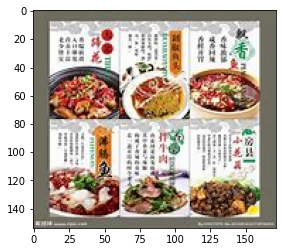

the style is: 超写实
the color is: blue
the element is: human
the emotion is: anxious


In [22]:
# 读取图片，并预览
# 注释
# opencv 
import cv2

import numpy as np
from matplotlib import pyplot as plt

#opencv读取图片，默认是 BGR ,不是rgb
img=cv2.imread('img/img_1.png',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

findStyle(img)
findColor(img)
findElement(img)
findEmotion(img)